Practical 5 (breast-cancer dataset)

In [ ]:
# Q5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers.
# Divide the data set into training and test set. Compare the accuracy of the different classifiers
# under the following situations:
# 5.1 a) Training set = 75% Test set = 25% b) Training set = 66.6% (2/3rd of total), Test set =
# 33.3%
# 5.2 Training set is chosen by i) hold out method ii) Random subsampling iii) Cross-Validation.
# Compare the accuracy of the classifiers obtained.
# 5.3 Data is scaled to standard format

In [51]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
import numpy as np
import pandas as pd

In [52]:
#Classification for breast-cancer dataset
df = pd.read_csv('breast_cancer.csv')

In [53]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [55]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [56]:
df = df.drop(['id'], axis=1)

In [57]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [58]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [59]:
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [60]:
(df.isnull() | df.empty | df.isna()).sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [61]:
df = df.drop(['Unnamed: 32'],axis =1)

In [63]:
(df.isnull() | df.empty | df.isna()).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [64]:
encoder = LabelEncoder()

In [65]:
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [66]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
# converted characters to numerical data

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()

In [70]:
scaled_data = scaler.fit_transform(df.iloc[:,1:])

In [71]:
df1 = pd.DataFrame(scaled_data, columns = list(df.columns)[1:])

In [72]:
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [73]:
# scaled/normalized the entire data

In [74]:
df1['diagnosis'] = df['diagnosis']

In [75]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,...,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16,2.321908e-16,0.372583
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,0.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


In [76]:
x = df1.drop('diagnosis',axis=1)
y = df1['diagnosis']

In [77]:
# HOLD OUT METHOD TEST SIZE = 25%

In [78]:
k_size = 0.25
r_seed = 100
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = k_size,random_state = r_seed)

In [79]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (426, 30)
Shape of y_train: (426,)
Shape of X_test: (143, 30)
Shape of y_test: (143,)


In [80]:
# DECISION TREE CLASSIFICATION

In [81]:
deci_tree = DecisionTreeClassifier(criterion='entropy') # by default gini
deci_tree.fit(X_train,y_train)
prediction = deci_tree.predict(X_test)

In [82]:
# CLASSIFICATION METRICS

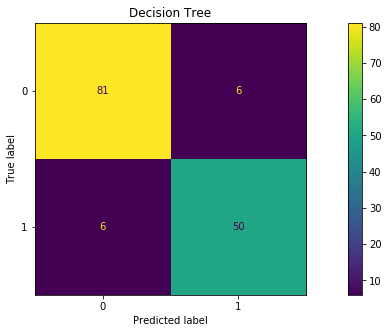

In [83]:
fig, (ax1) = plt.subplots()
fig.set_size_inches(15,5)

ax1.set_title("Decision Tree")
ConfusionMatrixDisplay.from_estimator(deci_tree, X_test, y_test, ax=ax1)

In [116]:
print("Accuracy on the test data")
dt_accuracy_deciTree = accuracy_score(y_test, prediction)
print(f"Decision tree accuracy: {dt_accuracy_deciTree * 100}%")

print("\nClassification report on the test data")
print(classification_report(y_test, prediction))

Accuracy on the test data
Decision tree accuracy: 90.20979020979021%

Classification report on the test data
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        91
           1       0.81      0.96      0.88        52

    accuracy                           0.90       143
   macro avg       0.89      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143



In [85]:
# tree
from sklearn import tree

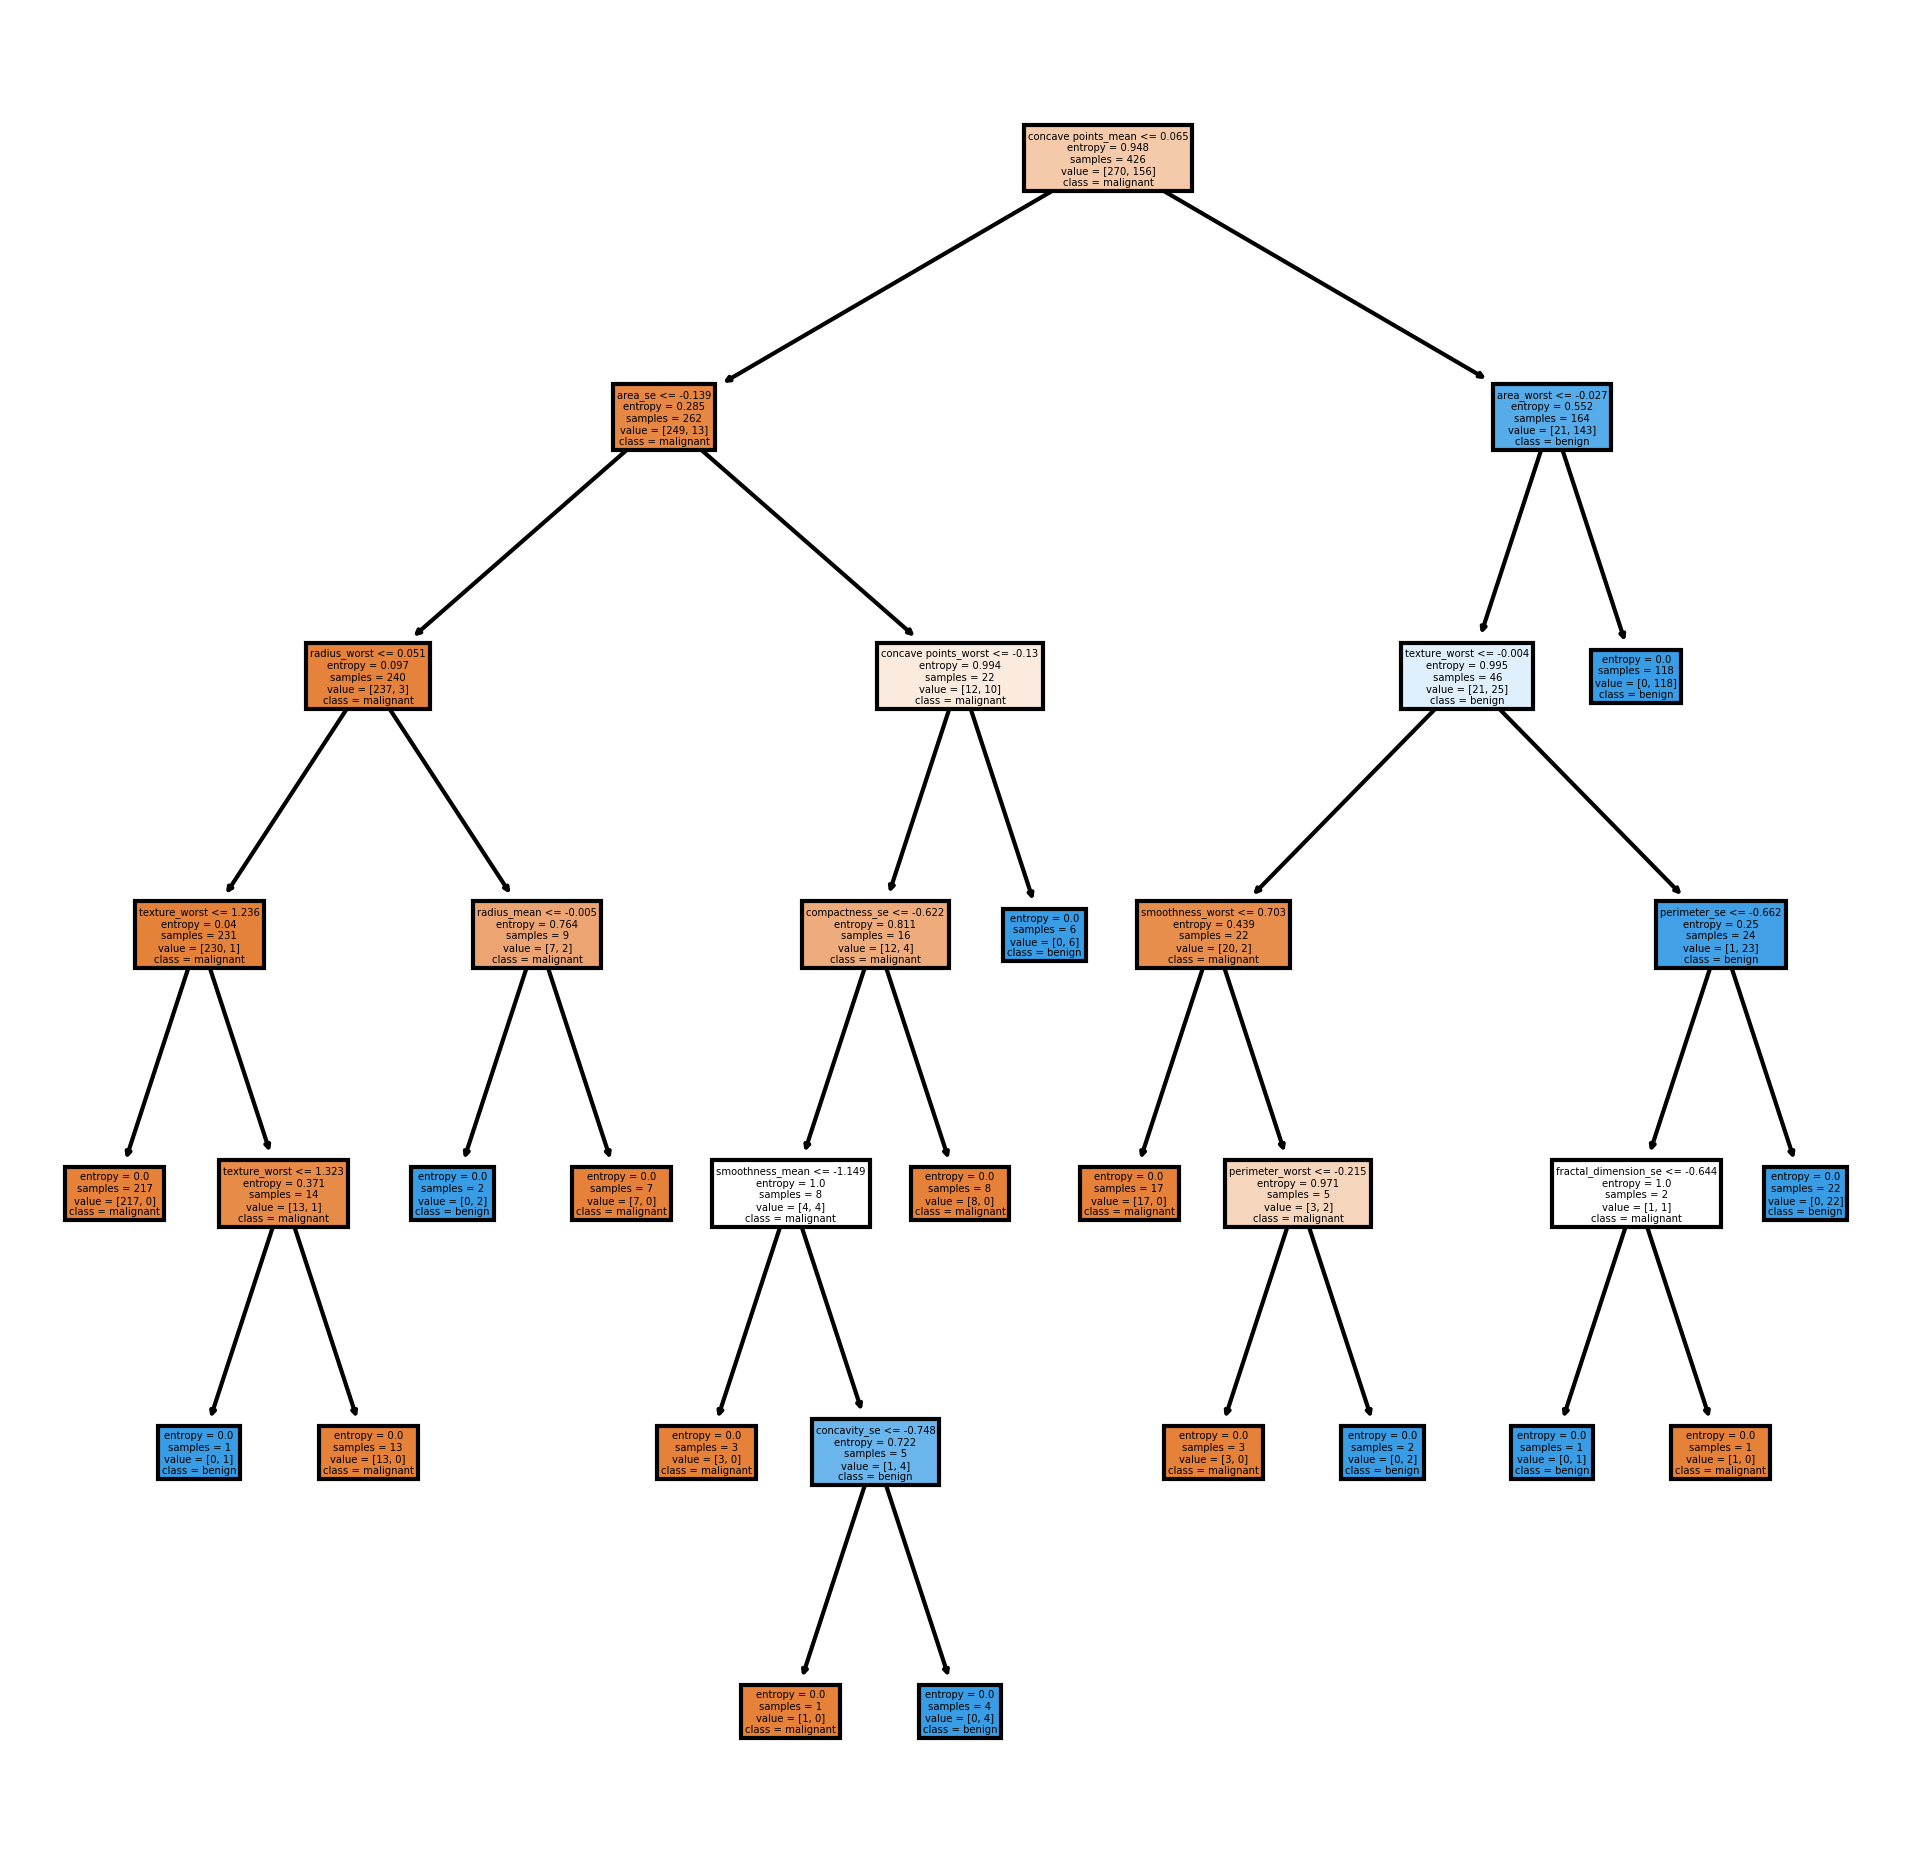

In [86]:
fn=list(df1.columns[:-1])
cn=['malignant','benign']
fig,axes = plt.subplots(nrows = 1,ncols=1,figsize=(8,8),dpi=300)
tree.plot_tree(deci_tree,
               feature_names=fn,
               class_names=cn,
               filled=True);
fig.savefig('VaibhavRaaj.png')  

[Text(0.5795454545454546, 0.9285714285714286, 'X[7] <= 0.065\nentropy = 0.948\nsamples = 426\nvalue = [270, 156]'),
 Text(0.3409090909090909, 0.7857142857142857, 'X[13] <= -0.139\nentropy = 0.285\nsamples = 262\nvalue = [249, 13]'),
 Text(0.18181818181818182, 0.6428571428571429, 'X[20] <= 0.051\nentropy = 0.097\nsamples = 240\nvalue = [237, 3]'),
 Text(0.09090909090909091, 0.5, 'X[21] <= 1.236\nentropy = 0.04\nsamples = 231\nvalue = [230, 1]'),
 Text(0.045454545454545456, 0.35714285714285715, 'entropy = 0.0\nsamples = 217\nvalue = [217, 0]'),
 Text(0.13636363636363635, 0.35714285714285715, 'X[21] <= 1.323\nentropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(0.09090909090909091, 0.21428571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.21428571428571427, 'entropy = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.2727272727272727, 0.5, 'X[0] <= -0.005\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.22727272727272727, 0.35714285714285715, 

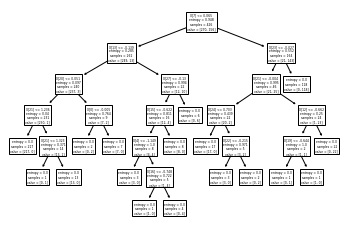

In [87]:
tree.plot_tree(deci_tree)

In [88]:
# naive bayes in holdout

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
#fitting the model
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [91]:
prediction_nb = nb.predict(X_test)

In [92]:
print("Accuracy on the Test Data ")
nb_score=accuracy_score(y_test,prediction_nb)
print(f"Naive-bayes accuracy: {nb_score*100}%")

print("Classification Report on the Test Data")
print(classification_report(y_test,prediction_nb))

Accuracy on the Test Data 
Naive-bayes accuracy: 94.4055944055944%
Classification Report on the Test Data
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        87
           1       0.94      0.91      0.93        56

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [96]:
# KNN in holdout
# knn
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [98]:
print("Accuracy on the Test Data ")
print(accuracy_score(y_test,prediction))

print("Classification Report on the Test Data")
print(classification_report(y_test,prediction))

Accuracy on the Test Data 
0.9440559440559441
Classification Report on the Test Data
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        87
           1       0.93      0.93      0.93        56

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [99]:
# random subsampling

In [100]:
acc = []

dec_tree = DecisionTreeClassifier( criterion = 'entropy')

for i in range(10):
  X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i+1)

  dec_tree.fit(X_train, y_train)
  prediction = dec_tree.predict(X_test)
  acc.append(accuracy_score(y_test, prediction))


acc = sum(acc) / len(acc)

In [101]:
acc

0.9237762237762237

In [102]:
print("Accuracy on the test data ", acc*100, "%")

Accuracy on the test data  92.37762237762237 %


In [103]:
nb = GaussianNB()

In [104]:
nb.fit(X_train, y_train)

GaussianNB()

In [105]:
prediction_nb = nb.predict(X_test)

In [106]:
print("Accuracy on the Test Data ")
nb_score2=accuracy_score(y_test,prediction_nb)
print(f"Naive-bayes accuracy: {nb_score2*100}%")

print("Classification Report on the Test Data")
print(classification_report(y_test,prediction_nb))

Accuracy on the Test Data 
Naive-bayes accuracy: 95.1048951048951%
Classification Report on the Test Data
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        91
           1       0.92      0.94      0.93        52

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [107]:
# cross validation

In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [109]:
kf = KFold(n_splits = 10)

score = cross_val_score(dec_tree, x, y, cv=10)

In [110]:
score = np.array(score)
score

array([0.92982456, 0.89473684, 0.96491228, 0.87719298, 1.        ,
       0.94736842, 0.92982456, 0.92982456, 0.96491228, 0.94642857])

In [111]:
print("accuracy: ", score*100, "%")

accuracy:  [ 92.98245614  89.47368421  96.49122807  87.71929825 100.
  94.73684211  92.98245614  92.98245614  96.49122807  94.64285714] %


In [112]:
nb = GaussianNB()
score3 = cross_val_score(nb, x, y, cv=10)

In [113]:
score3

array([0.94736842, 0.87719298, 0.89473684, 0.92982456, 0.92982456,
       0.98245614, 0.92982456, 0.96491228, 0.89473684, 0.96428571])

In [114]:
print("Accuracy on the test data: ", score3.mean()*100, "%")

Accuracy on the test data:  93.15162907268169 %


In [ ]:
# comparing accuracies

In [125]:
print(f'accuracy with Naive Bayes on HoldOut 25% testing \t\t : {nb_score * 100}%')
print(f'accuracy with Decision Tree on Holdout using Entropy : \t\t   { dt_accuracy_deciTree* 100}%')
print(f'accuracy with knn \t\t\t\t\t\t : {accuracy_score(y_test,prediction)*100}%')
print(f'accuracy with random subsampling with decision tree using entropy: {acc * 100}%')
print(f'accuracy with Naive Bayes on random subsampling \t\t : {nb_score2*100}%')
print(f'accuracy with cross validation with KFold \t\t\t : {score.mean()*100}%')
print(f'accuracy with cross validation with KFold with Naive Bayes \t : {score3.mean()*100}%')

accuracy with Naive Bayes on HoldOut 25% testing 		 : 94.4055944055944%
accuracy with Decision Tree on Holdout using Entropy : 		   90.20979020979021%
accuracy with knn 						 : 90.20979020979021%
accuracy with random subsampling with decision tree using entropy: 92.37762237762237%
accuracy with Naive Bayes on random subsampling 		 : 95.1048951048951%
accuracy with cross validation with KFold 			 : 93.8502506265664%
accuracy with cross validation with KFold with Naive Bayes 	 : 93.15162907268169%
